## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


Content Attributes:

People:
* `ID`: Customer's unique identifier
* `Year_Birth`: Customer's birth year
* `Education`: Customer's education level
* `Marital_Status`: Customer's marital status
* `Income`: Customer's yearly household income
* `Kidhome`: Number of children in customer's household
* `Teenhome`: Number of teenagers in customer's household
* `Dt_Customer`: Date of customer's enrollment with the company
* `Recency`: Number of days since customer's last purchase
* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise


Products:
* `MntWines`: Amount spent on wine in last 2 years
* `MntFruits`: Amount spent on fruits in last 2 years
* `MntMeatProducts`: Amount spent on meat in last 2 years
* `MntFishProducts`: Amount spent on fish in last 2 years
* `MntSweetProducts`: Amount spent on sweets in last 2 years
* `MntGoldProds`: Amount spent on gold in last 2 years


Promotion:
* `NumDealsPurchases`: Number of purchases made with a discount
* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise


Place:
* `NumWebPurchases`: Number of purchases made through the company’s website
* `NumCatalogPurchases`: Number of purchases made using a catalogue
* `NumStorePurchases`: Number of purchases made directly in stores
* `NumWebVisitsMonth`: Number of visits to company’s website in the last month

* `Target`:
Need to perform clustering to summarize customer segments.

In [1]:
## Base imports

import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Load the data

df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv")

## Exploratory Data Analysis

In [3]:
## Check the data

df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [4]:
## Load with separator tab

df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep="\t")

In [5]:
## Now check the data

df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [6]:
## Check the meta data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
## Check the shape 

df.shape

(2240, 29)

In [9]:
## Check for missing values

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* We have 24 missing values in the `Income` feature

In [10]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [11]:
## Check for duplicate records

df.duplicated().sum()

0

In [12]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


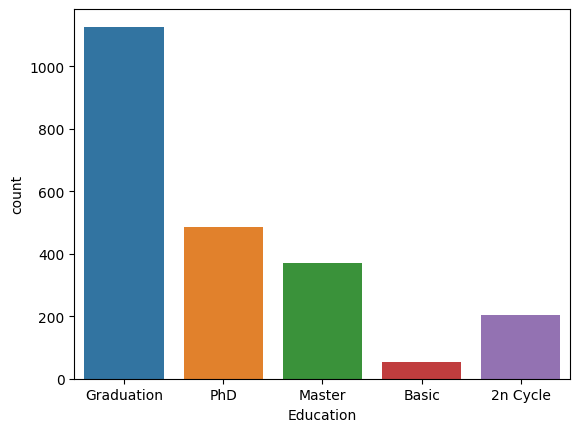

In [13]:
## Some data visualizations

sns.countplot(data=df, x='Education')
plt.show();

In [14]:
## Replace the education values

df['Education'] = df['Education'].replace({'Basic': 'Primary', '2n Cycle': 'Secondary'})

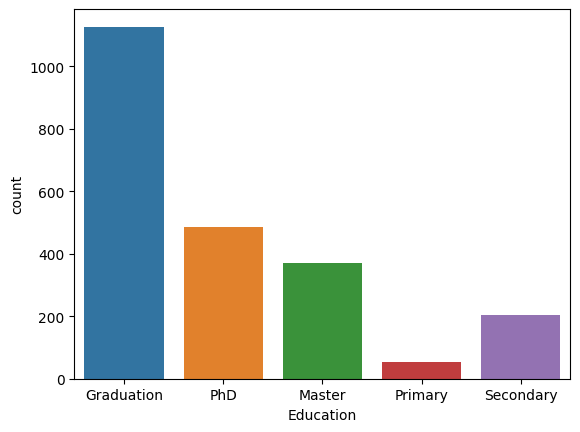

In [15]:
sns.countplot(data=df, x='Education')
plt.show();

In [16]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [17]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')

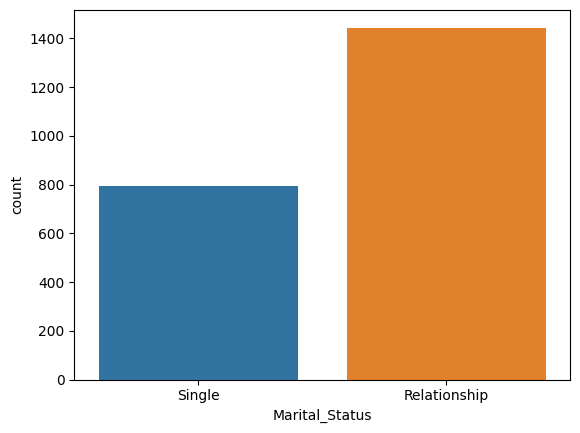

In [18]:
sns.countplot(data=df, x='Marital_Status')
plt.show();

In [19]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [20]:
## Dropping some columns

df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

df.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0


## Separating Products to different Dataframe for Association Rule Mining

In [21]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [22]:
product_data = []

for i in range(0, len(df)):
    products = [df['MntWines'][i], df['MntFruits'][i], 
                  df['MntMeatProducts'][i], df['MntFishProducts'][i], 
                  df['MntSweetProducts'][i], df['MntGoldProds'][i]]
    
    product_data.append(products)
    
products_df = pd.DataFrame(product_data, columns=[
    'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'
])

products_df.head()

,Wines,Fruits,Meat,Fish,Sweet,Gold
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [23]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

## Combining different features into a single feature to reduce the number of dimension

In [24]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [25]:
## Dropping the columns

columns_to_drop = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=columns_to_drop,axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,1965,Graduation,Relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,1984,Graduation,Relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,1981,PhD,Relationship,58293.0,19-01-2014,94,0,1,422,0,19


In [26]:
## Creating an new column Age

current_year = datetime.now().year

df['Age'] = current_year - df['Year_Birth']

df.head(2)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
0,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25,67
1,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6,70


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Dt_Customer        2240 non-null   object 
 5   Recency            2240 non-null   int64  
 6   Complain           2240 non-null   int64  
 7   Kids               2240 non-null   int64  
 8   Expenses           2240 non-null   int64  
 9   TotalAcceptedCmp   2240 non-null   int64  
 10  NumTotalPurchases  2240 non-null   int64  
 11  Age                2240 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 210.1+ KB


In [28]:
## Change the dt_customer into datetime format

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [29]:
df['first_day'] = '01-01-2024'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [30]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,first_day,day_engaged
0,1957,Graduation,Single,58138.0,2012-09-04,58,0,0,1617,1,25,67,2024-01-01,4136
1,1954,Graduation,Single,46344.0,2014-03-08,38,0,2,27,0,6,70,2024-01-01,3586
2,1965,Graduation,Relationship,71613.0,2013-08-21,26,0,0,776,0,21,59,2024-01-01,3785
3,1984,Graduation,Relationship,26646.0,2014-02-10,26,0,1,53,0,8,40,2024-01-01,3612
4,1981,PhD,Relationship,58293.0,2014-01-19,94,0,1,422,0,19,43,2024-01-01,3634


In [31]:
## Dropping some more columns

df = df.drop(columns=["Year_Birth", "Dt_Customer", "first_day", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

## Data Visualizations

In [32]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Age', 'day_engaged'],
      dtype='object')

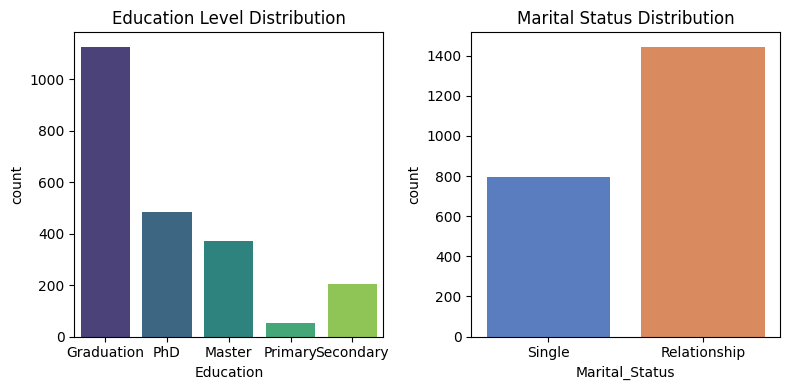

In [33]:
plt.figure(figsize=(8, 4))

# Plotting Education distribution
plt.subplot(1, 2, 1)
sns.countplot(x='Education', data=df, palette='viridis')
plt.title('Education Level Distribution')

# Plotting Marital Status distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Marital_Status', data=df, palette='muted')
plt.title('Marital Status Distribution')

plt.tight_layout()
plt.show();

## Observation:

* Majority of our customers are graduated.
* Most of them are in relationship.

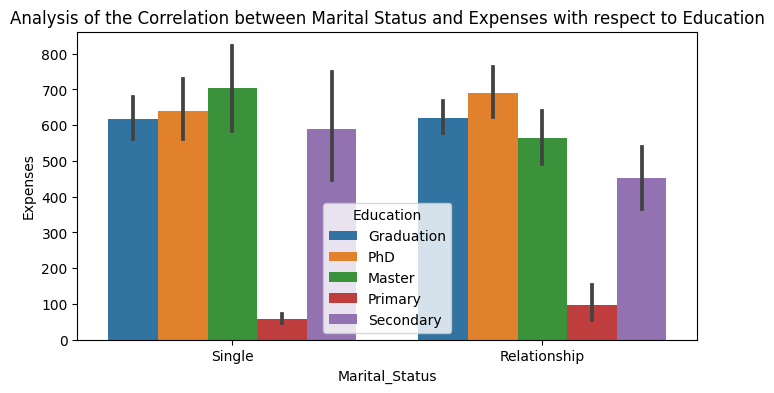

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['Marital_Status'], y=df['Expenses'], hue=df['Education'])
plt.title("Analysis of the Correlation between Marital Status and Expenses with respect to Education")
plt.show();

## Observation:

* Those customers who are single and holds a Master's have high expenses.
* In case of customers who are in relationship, PhD customers have high expenses.

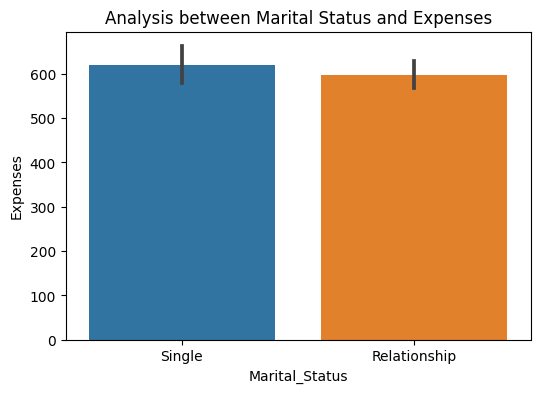

In [35]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['Marital_Status'], y=df['Expenses'])
plt.title("Analysis between Marital Status and Expenses")
plt.show();

## Observation:

* Single customers have higher expenses.

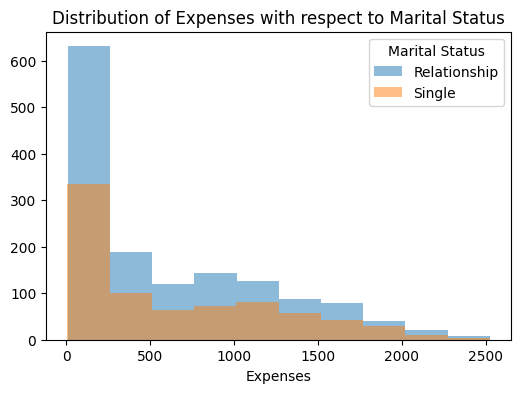

In [36]:
plt.figure(figsize=(6, 4))
plt.hist("Expenses", data = df[df["Marital_Status"] == "Relationship"], alpha = 0.5, label = "Relationship")
plt.hist("Expenses", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Expenses with respect to Marital Status")
plt.xlabel("Expenses")
plt.legend(title = "Marital Status")
plt.show();

In [37]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
Secondary      203
Primary         54
Name: count, dtype: int64

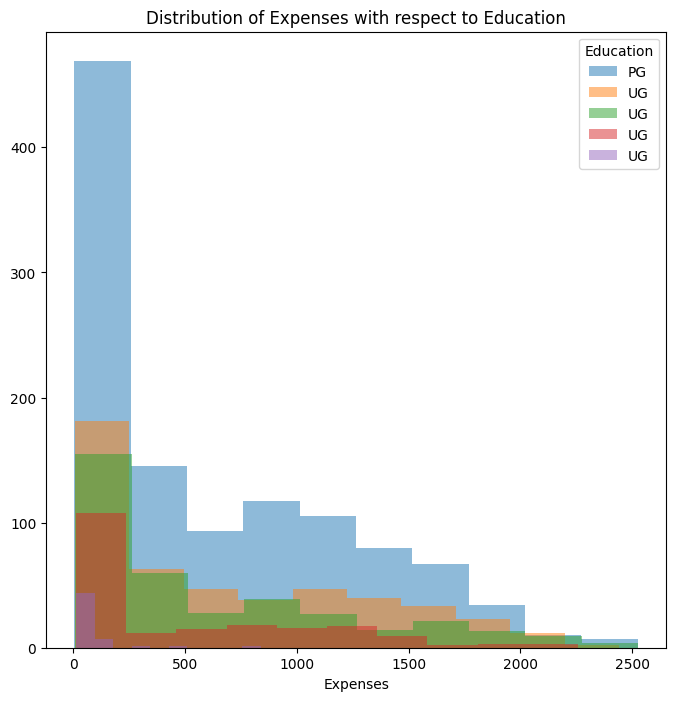

In [38]:
#from numpy.core.fromnumeric import size
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = df[df["Education"] == "Graduation"], alpha = 0.5, label = "PG")
plt.hist("Expenses", data = df[df["Education"] == "PhD"], alpha = 0.5, label = "UG")
plt.hist("Expenses", data = df[df["Education"] == "Master"], alpha = 0.5, label = "UG")
plt.hist("Expenses", data = df[df["Education"] == "Secondary"], alpha = 0.5, label = "UG")
plt.hist("Expenses", data = df[df["Education"] == "Primary"], alpha = 0.5, label = "UG")
plt.title("Distribution of Expenses with respect to Education")
plt.xlabel("Expenses")
plt.legend(title = "Education")
plt.show();

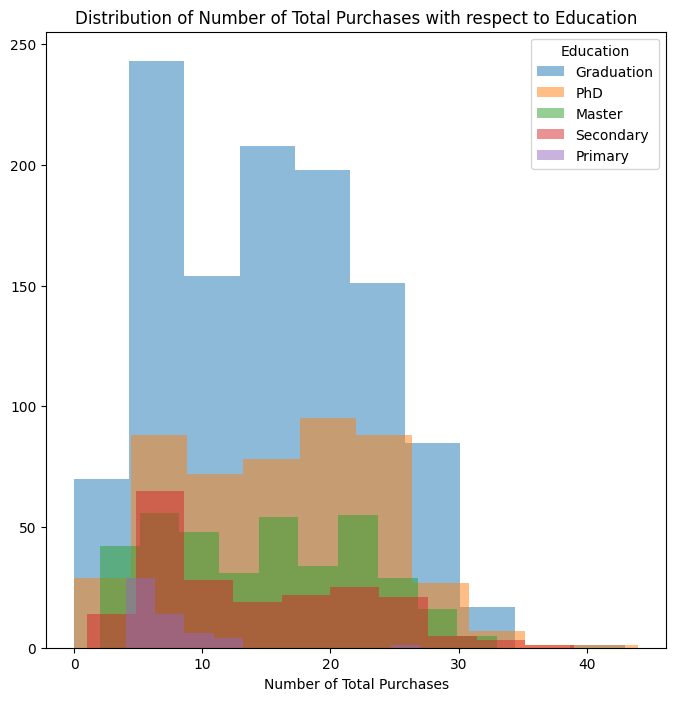

In [39]:
plt.figure(figsize=(8,8))
plt.hist("NumTotalPurchases", data = df[df["Education"] == "Graduation"], alpha = 0.5, label = "Graduation")
plt.hist("NumTotalPurchases", data = df[df["Education"] == "PhD"], alpha = 0.5, label = "PhD")
plt.hist("NumTotalPurchases", data = df[df["Education"] == "Master"], alpha = 0.5, label = "Master")
plt.hist("NumTotalPurchases", data = df[df["Education"] == "Secondary"], alpha = 0.5, label = "Secondary")
plt.hist("NumTotalPurchases", data = df[df["Education"] == "Primary"], alpha = 0.5, label = "Primary")
plt.title("Distribution of Number of Total Purchases with respect to Education")
plt.xlabel("Number of Total Purchases")
plt.legend(title = "Education")
plt.show();

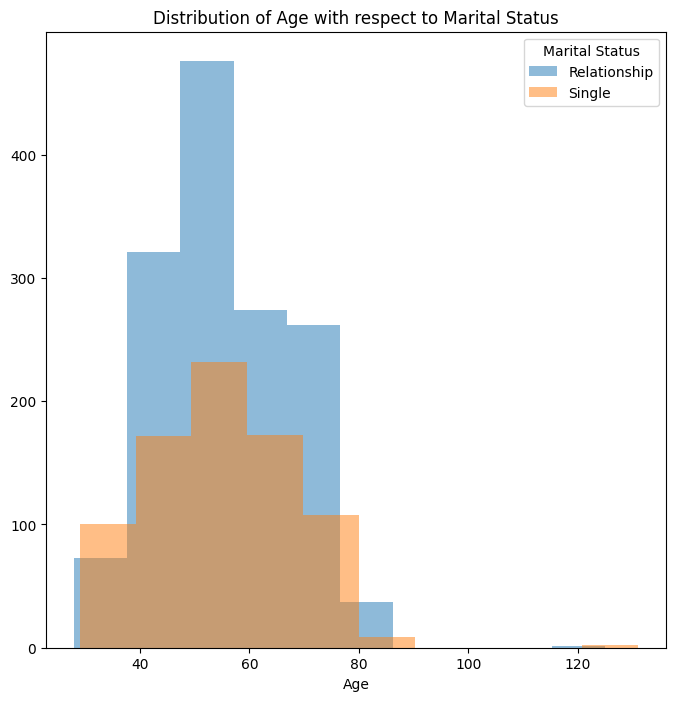

In [40]:
plt.figure(figsize=(8,8))
plt.hist("Age", data = df[df["Marital_Status"] == "Relationship"], alpha = 0.5, label = "Relationship")
plt.hist("Age", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Age with respect to Marital Status")
plt.xlabel("Age")
plt.legend(title = "Marital Status")
plt.show();

In [41]:
df['Age'].mean()

55.19419642857143

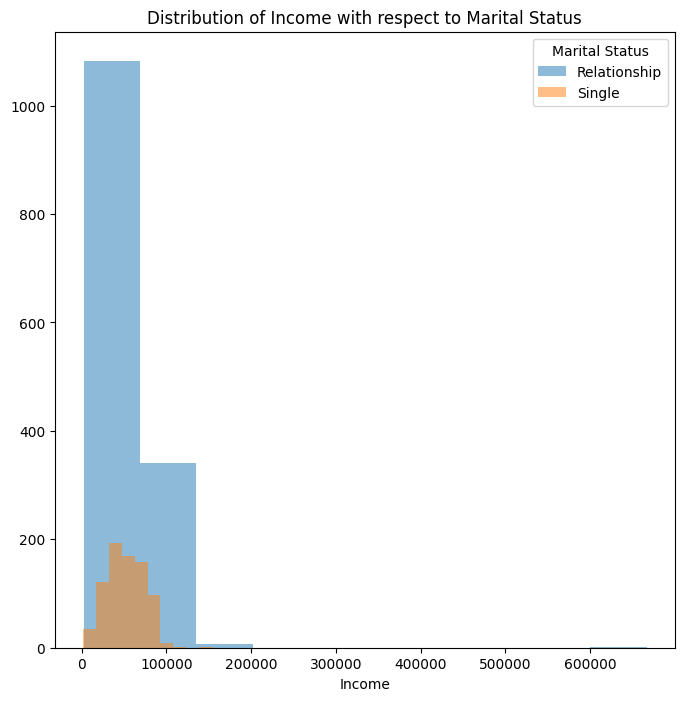

In [42]:
plt.figure(figsize=(8,8))
plt.hist("Income", data = df[df["Marital_Status"] == "Relationship"], alpha = 0.5, label = "Relationship")
plt.hist("Income", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Income with respect to Marital Status")
plt.xlabel("Income")
plt.legend(title = "Marital Status")
plt.show();

## Distribution of Marital Status

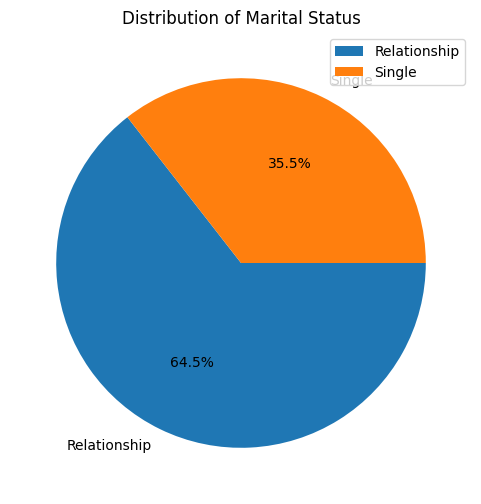

In [43]:
plt.figure(figsize=(6,6))
plt.pie(df["Marital_Status"].value_counts(), labels = ["Relationship", "Single"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.title("Distribution of Marital Status")
plt.show();

## Distribution of Education Level

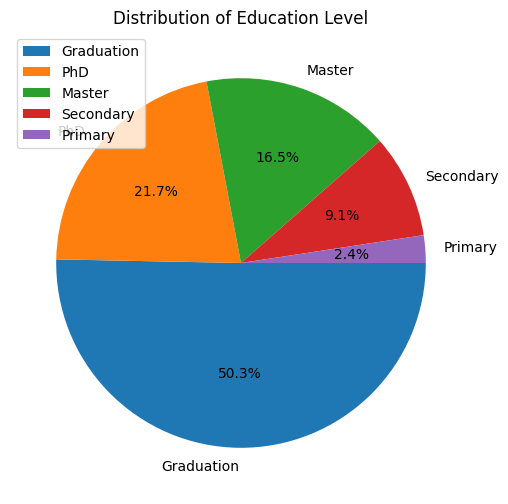

In [44]:
plt.figure(figsize=(8,6))
plt.pie(df["Education"].value_counts(), labels = ["Graduation", "PhD", "Master", "Secondary", "Primary"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.title("Distribution of Education Level")
plt.show();

## Average Income by Education Level

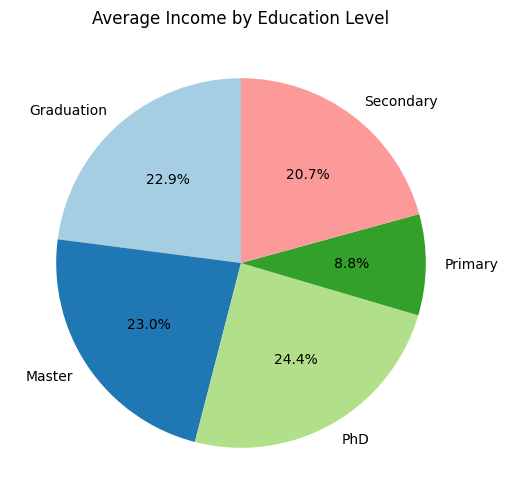

In [45]:
education_income = df.groupby('Education')['Income'].mean().reset_index()

# Plotting a pie chart
plt.figure(figsize=(10, 6))
plt.pie(education_income['Income'], labels=education_income['Education'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Average Income by Education Level')
plt.show();

In [46]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,Graduation,Single,58138.0,0,1617,1,25,67,4136
1,Graduation,Single,46344.0,2,27,0,6,70,3586
2,Graduation,Relationship,71613.0,0,776,0,21,59,3785
3,Graduation,Relationship,26646.0,1,53,0,8,40,3612
4,PhD,Relationship,58293.0,1,422,0,19,43,3634


In [47]:
df.isnull().sum()

Education             0
Marital_Status        0
Income               24
Kids                  0
Expenses              0
TotalAcceptedCmp      0
NumTotalPurchases     0
Age                   0
day_engaged           0
dtype: int64

## Countplot of Marital Status with Education Level

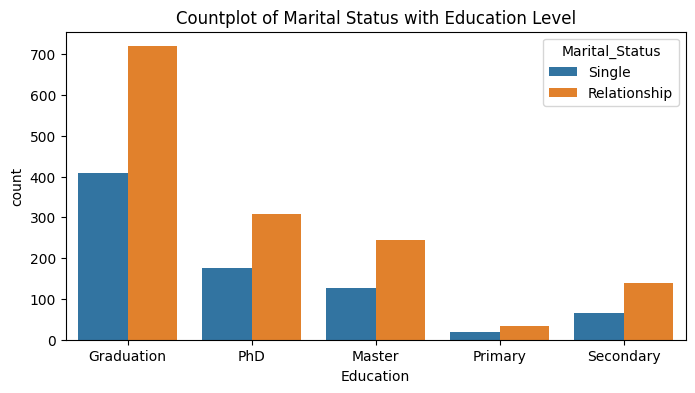

In [48]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Education', hue='Marital_Status', data=df)
plt.title('Countplot of Marital Status with Education Level')
plt.show()

In [49]:
## Fill the missing value

df['Income'] = df['Income'].fillna(df['Income'].median())

In [50]:
df.isnull().sum()

Education            0
Marital_Status       0
Income               0
Kids                 0
Expenses             0
TotalAcceptedCmp     0
NumTotalPurchases    0
Age                  0
day_engaged          0
dtype: int64

In [51]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,Graduation,Single,58138.0,0,1617,1,25,67,4136
1,Graduation,Single,46344.0,2,27,0,6,70,3586
2,Graduation,Relationship,71613.0,0,776,0,21,59,3785
3,Graduation,Relationship,26646.0,1,53,0,8,40,3612
4,PhD,Relationship,58293.0,1,422,0,19,43,3634


In [52]:
categorical_columns = []

for i in df.columns:
    if (df[i].dtypes == "object"):
        categorical_columns.append(i)

In [53]:
categorical_columns

['Education', 'Marital_Status']

## Encoding the categorical columns with label encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
lbl_encoder = LabelEncoder()

for i in categorical_columns:
    df[i] = df[[i]].apply(lbl_encoder.fit_transform)

In [56]:
encoded_df = df.copy()

encoded_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,0,1,58138.0,0,1617,1,25,67,4136
1,0,1,46344.0,2,27,0,6,70,3586
2,0,0,71613.0,0,776,0,21,59,3785
3,0,0,26646.0,1,53,0,8,40,3612
4,2,0,58293.0,1,422,0,19,43,3634


## Handling Outliers

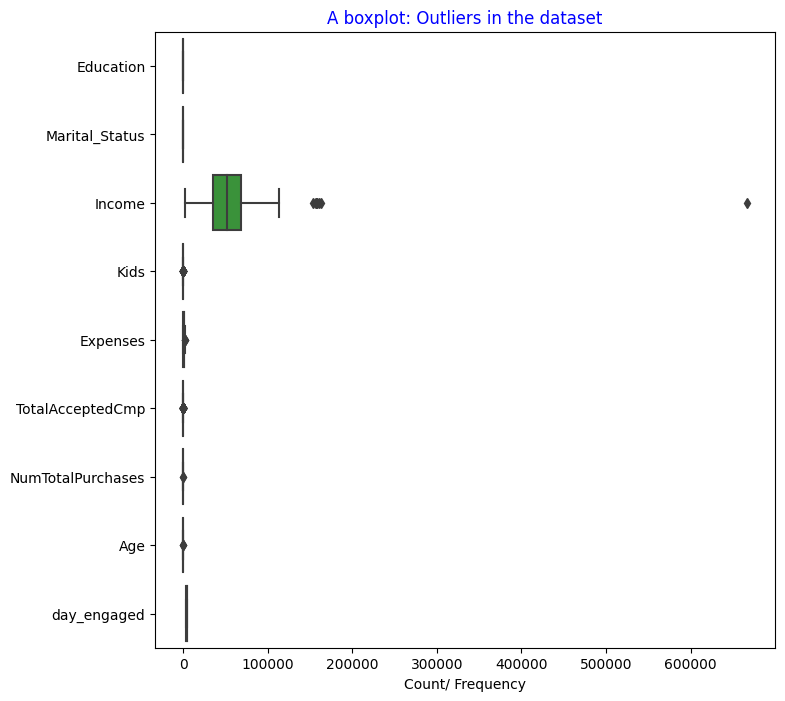

In [57]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=encoded_df , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show();

In [58]:
df_with_outliers = encoded_df.copy()

In [59]:
from math import sqrt

# Drop Outliers
q3 = encoded_df.quantile(0.75)
q1 = encoded_df.quantile(0.25)
iqr = q3-q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

encoded_df = encoded_df[~( (encoded_df < lower_range)|(encoded_df > upper_range) ).any(axis=1)]

## Applying Clustering 

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # evaluation metrics

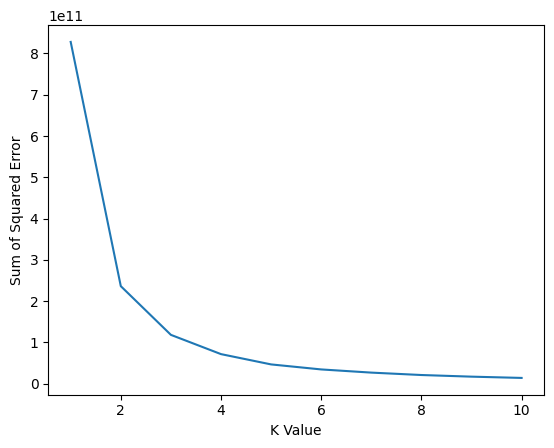

In [61]:
k_range = range(1, 11) # Defining the range from 1 to 10
sse = [] # sse

for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(encoded_df)
  sse.append(km.inertia_)

plt.xlabel('K Value')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)
plt.show();

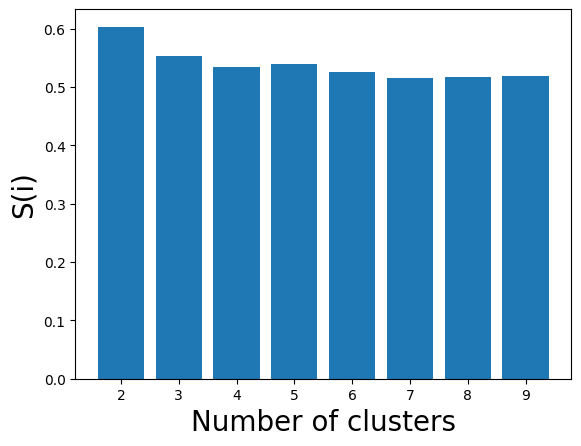

In [62]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(encoded_df)
    silhouette_scores.append(silhouette_score(encoded_df, m1.fit_predict(encoded_df))) 
    
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show();

In [63]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


## Observation:

As the silhouette score for k=2 is the highest, we will go with n_clusters=2 

## Model Building

In [64]:
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42).fit(encoded_df)

y_preds = kmeans.predict(encoded_df)

In [65]:
encoded_df['Cluster'] = y_preds + 1

In [66]:
encoded_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,Cluster
0,0,1,58138.0,0,1617,1,25,67,4136,1
1,0,1,46344.0,2,27,0,6,70,3586,2
2,0,0,71613.0,0,776,0,21,59,3785,1
3,0,0,26646.0,1,53,0,8,40,3612,2
4,2,0,58293.0,1,422,0,19,43,3634,1


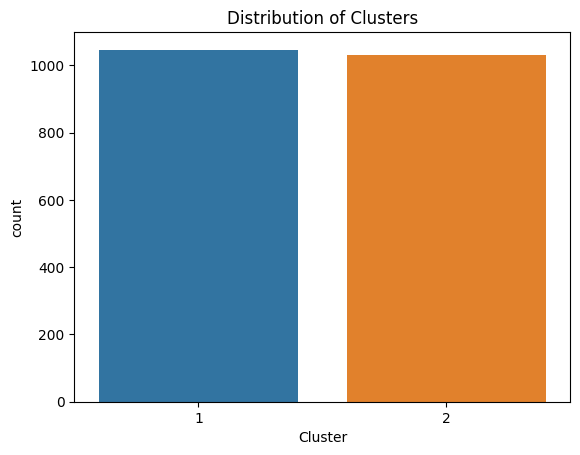

Cluster
1    1046
2    1030
Name: count, dtype: int64

In [67]:
sns.countplot(data=encoded_df, x='Cluster')
plt.title('Distribution of Clusters')
plt.show();

encoded_df['Cluster'].value_counts()

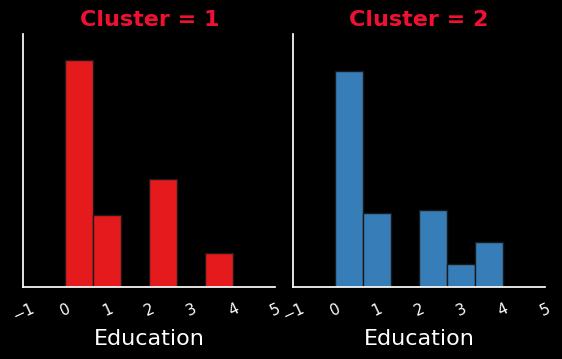

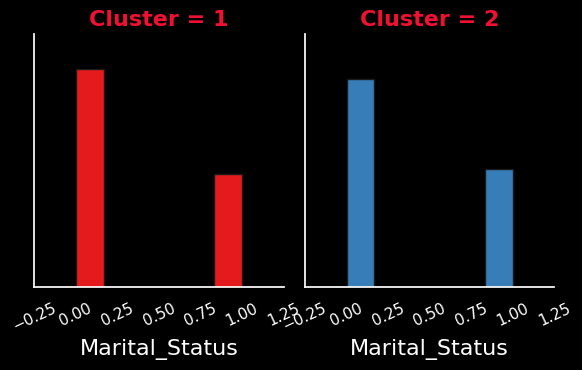

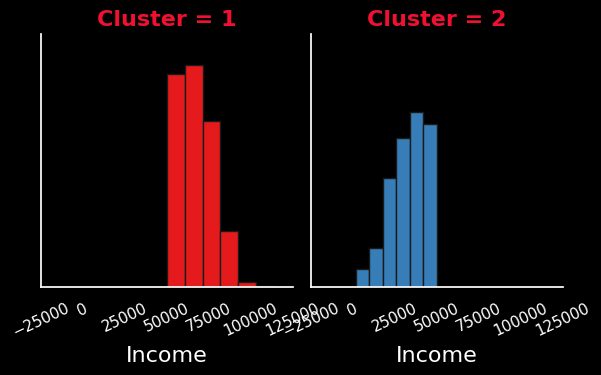

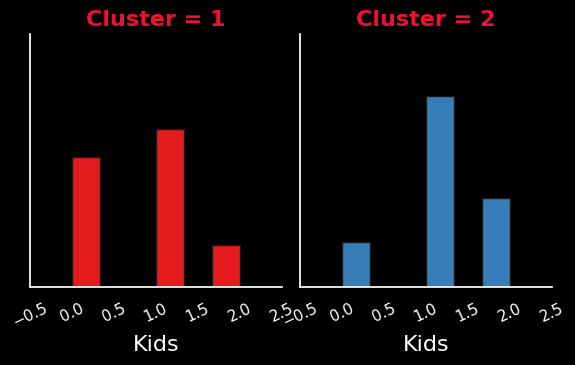

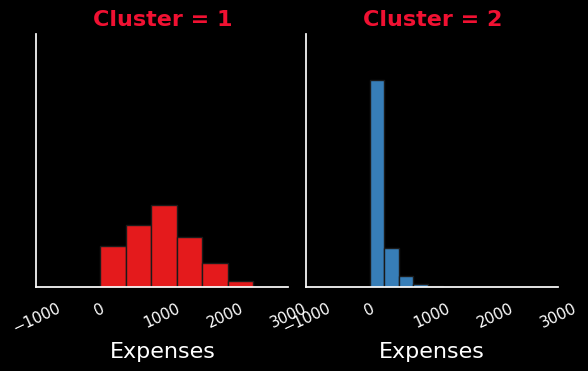

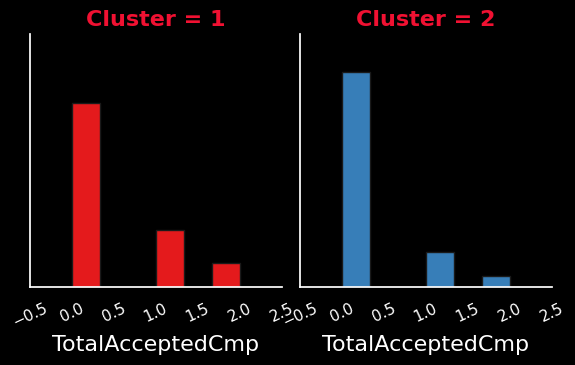

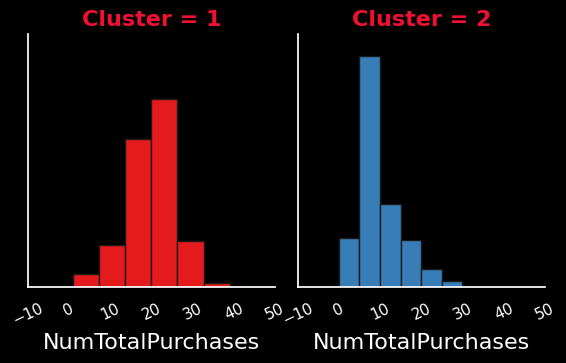

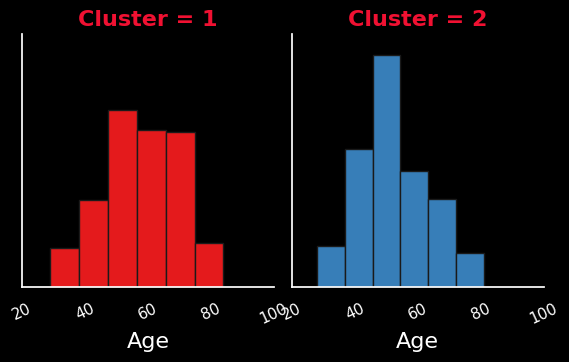

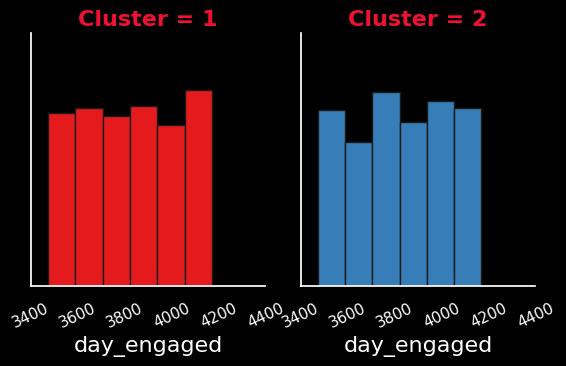

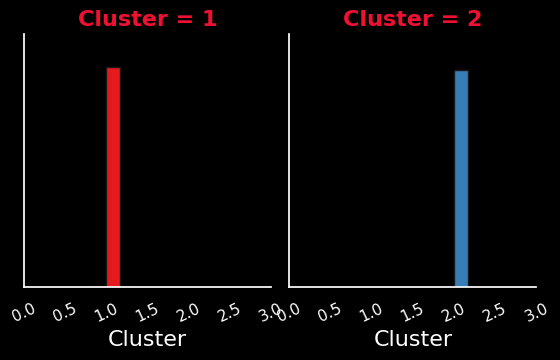

In [68]:
# Set Seaborn style
sns.set(rc={'axes.facecolor': 'black', 'figure.facecolor': 'black', 'axes.grid': False, 'font.family': 'Ubuntu'})

# Specify the columns to visualize
columns_to_visualize = encoded_df.columns

# Define the number of bins for the histograms
num_bins = 6

# Create a FacetGrid for each column
for column in columns_to_visualize:
    diag = sns.FacetGrid(encoded_df, col="Cluster", hue="Cluster", palette="Set1")
    diag.map(plt.hist, column, bins=num_bins, edgecolor="k") 
    
    # Set styling for x-axis
    diag.set_xticklabels(rotation=25, color='white')
    diag.set_xlabels(size=16, color='white')
    
    # Set styling for y-axis
    diag.set_yticklabels(color='white')
    
    # Set title styling
    diag.set_titles(size=16, color='#f01132', fontweight="bold")
    
    # Set the figure height
    diag.fig.set_figheight(4)

# Display the plot
plt.show();

## Observations:

Based on the above charts we can divide customers into 2 parts

* Higly active customers - belongs to Cluster 1

* Least active customers - belongs to Cluster 2 

## Model Evaluation

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

print("ConfusionMatrix \n",confusion_matrix(kmeans.labels_, y_preds))
print("classification report \n", classification_report(kmeans.labels_, y_preds))

ConfusionMatrix 
 [[1046    0]
 [   0 1030]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1046
           1       1.00      1.00      1.00      1030

    accuracy                           1.00      2076
   macro avg       1.00      1.00      1.00      2076
weighted avg       1.00      1.00      1.00      2076



## Using Association Rule Mining Technique: Apriori

In [70]:
!pip install apyori

  Preparing metadata (setup.py) ... - done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=975cdf4447cdfb05a10a64ee102e82637fa3551bc3b00584ee00c974882ec79d
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [71]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [72]:
final_df = encoded_df.copy()

In [73]:
final_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,Cluster
0,0,1,58138.0,0,1617,1,25,67,4136,1
1,0,1,46344.0,2,27,0,6,70,3586,2
2,0,0,71613.0,0,776,0,21,59,3785,1
3,0,0,26646.0,1,53,0,8,40,3612,2
4,2,0,58293.0,1,422,0,19,43,3634,1


In [74]:
#Create Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
final_df['Age_group'] = pd.cut(final_df['Age'], bins=cut_bins, labels=cut_labels_Age)

#Create Income segment
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
final_df['Income_group'] = pd.qcut(final_df['Income'], q=4, labels=cut_labels_Income)

#Create day engaged segment
cut_labels_dayengaged = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
final_df['dayengaged_group'] = pd.qcut(final_df['day_engaged'], q=4, labels=cut_labels_dayengaged)

final_df=final_df.drop(columns=['Age','Income','day_engaged'], axis=1)

In [75]:
final_df.head()

,Education,Marital_Status,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Cluster,Age_group,Income_group,dayengaged_group
0,0,1,0,1617,1,25,1,Senior,Medium to high income,Old customers
1,0,1,2,27,0,6,2,Senior,Low to medium income,New customers
2,0,0,0,776,0,21,1,Mature,High income,Discovering customers
3,0,0,1,53,0,8,2,Adult,Low income,New customers
4,2,0,1,422,0,19,1,Adult,Medium to high income,New customers


In [76]:
cut_labels = ['Least Active Customer', 'Highly Active Customer']

final_df['Wines_segment'] = pd.qcut(products_df['Wines'][products_df['Wines']>0],q=[0, 0.5 ,1], labels=cut_labels).astype("object")
final_df['Fruits_segment'] = pd.qcut(products_df['Fruits'][products_df['Fruits']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
final_df['Meat_segment'] = pd.qcut(products_df['Meat'][products_df['Meat']>0],q=[0, 0.5,1], labels=cut_labels).astype("object")
final_df['Fish_segment'] = pd.qcut(products_df['Fish'][products_df['Fish']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
final_df['Sweets_segment'] = pd.qcut(products_df['Sweet'][products_df['Sweet']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
final_df['Gold_segment'] = pd.qcut(products_df['Gold'][products_df['Gold']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")

final_df.replace(np.nan, "Inactive Customer",inplace=True)

final_df = final_df.astype(object)

In [77]:
final_df.head()

,Education,Marital_Status,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Cluster,Age_group,Income_group,dayengaged_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,0,1,0,1617,1,25,1,Senior,Medium to high income,Old customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
1,0,1,2,27,0,6,2,Senior,Low to medium income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
2,0,0,0,776,0,21,1,Mature,High income,Discovering customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
3,0,0,1,53,0,8,2,Adult,Low income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
4,2,0,1,422,0,19,1,Adult,Medium to high income,New customers,Least Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Least Active Customer


## Applying Apriori Algorithm

In [78]:
final_df.drop(["Education", 
               "Marital_Status", 
               "Kids", "Expenses", 
               "TotalAcceptedCmp", 
               "NumTotalPurchases", "Cluster"], axis = 1, inplace = True)

final_df.head()

,Age_group,Income_group,dayengaged_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,Senior,Medium to high income,Old customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
1,Senior,Low to medium income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
2,Mature,High income,Discovering customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
3,Adult,Low income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
4,Adult,Medium to high income,New customers,Least Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Least Active Customer


## Setting the association rules

In [79]:
df_ap = pd.get_dummies(final_df)

min_support = 0.08
max_len = 10

frequent_items = apriori(df_ap, use_colnames=True, min_support=min_support, max_len=max_len + 1)

rules = association_rules(frequent_items, metric='lift', min_threshold=1)

## Checking the Highly Active Customers according to Products

In [80]:
product='Wines'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)

wine_customers = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
wine_customers.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4316,"(Fish_segment_Highly Active Customer, Fruits_s...",(Wines_segment_Highly Active Customer),0.098748,0.484586,0.096339,0.975610,2.013286,0.048487,21.131985,0.558445
6976,"(Meat_segment_Highly Active Customer, Fish_seg...",(Wines_segment_Highly Active Customer),0.098748,0.484586,0.096339,0.975610,2.013286,0.048487,21.131985,0.558445
7156,"(Fish_segment_Highly Active Customer, Sweets_s...",(Wines_segment_Highly Active Customer),0.089595,0.484586,0.087187,0.973118,2.008145,0.043770,19.173410,0.551434
8996,"(Meat_segment_Highly Active Customer, Fish_seg...",(Wines_segment_Highly Active Customer),0.089595,0.484586,0.087187,0.973118,2.008145,0.043770,19.173410,0.551434
7277,"(Meat_segment_Highly Active Customer, Fish_seg...",(Wines_segment_Highly Active Customer),0.083333,0.484586,0.080925,0.971098,2.003976,0.040543,17.833333,0.546537


In [81]:
product='Fruits'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
fruits_customers = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
fruits_customers.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1874,"(Age_group_Mature, Gold_segment_Highly Active ...",(Fruits_segment_Highly Active Customer),0.090559,0.388728,0.084778,0.936170,2.408289,0.049576,9.576590,0.642996
4598,"(Meat_segment_Highly Active Customer, Age_grou...",(Fruits_segment_Highly Active Customer),0.090559,0.388728,0.084778,0.936170,2.408289,0.049576,9.576590,0.642996
8192,"(Meat_segment_Highly Active Customer, Fish_seg...",(Fruits_segment_Highly Active Customer),0.168112,0.388728,0.157033,0.934097,2.402957,0.091683,9.275383,0.701832
9372,"(Meat_segment_Highly Active Customer, Fish_seg...",(Fruits_segment_Highly Active Customer),0.152216,0.388728,0.142100,0.933544,2.401534,0.082930,9.198183,0.688382
8254,"(Meat_segment_Highly Active Customer, Sweets_s...",(Fruits_segment_Highly Active Customer),0.159441,0.388728,0.148844,0.933535,2.401509,0.086865,9.196860,0.694294


In [82]:
product='Meat'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
meat_customers = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
meat_customers.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9376,"(Fish_segment_Highly Active Customer, Sweets_s...",(Meat_segment_Highly Active Customer),0.142100,0.484104,0.142100,1.0,2.065672,0.073309,inf,0.601348
4459,"(Wines_segment_Highly Active Customer, Age_gro...",(Meat_segment_Highly Active Customer),0.086705,0.484104,0.086705,1.0,2.065672,0.044731,inf,0.564873
5780,"(Wines_segment_Highly Active Customer, Fruits_...",(Meat_segment_Highly Active Customer),0.165703,0.484104,0.165703,1.0,2.065672,0.085486,inf,0.618360
5750,"(Wines_segment_Highly Active Customer, Fruits_...",(Meat_segment_Highly Active Customer),0.182563,0.484104,0.182563,1.0,2.065672,0.094183,inf,0.631114
5720,"(Wines_segment_Highly Active Customer, Fish_se...",(Meat_segment_Highly Active Customer),0.188343,0.484104,0.188343,1.0,2.065672,0.097165,inf,0.635608


In [83]:
product='Fish'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
fish_customers = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
fish_customers.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5990,"(Wines_segment_Highly Active Customer, Sweets_...",(Fish_segment_Highly Active Customer),0.159923,0.398844,0.152697,0.954819,2.393967,0.088913,13.305588,0.693131
9375,"(Meat_segment_Highly Active Customer, Sweets_s...",(Fish_segment_Highly Active Customer),0.148844,0.398844,0.142100,0.954693,2.393649,0.082735,13.268373,0.684044
8319,"(Sweets_segment_Highly Active Customer, Income...",(Fish_segment_Highly Active Customer),0.148844,0.398844,0.142100,0.954693,2.393649,0.082735,13.268373,0.684044
8380,"(Meat_segment_Highly Active Customer, Sweets_s...",(Fish_segment_Highly Active Customer),0.159441,0.398844,0.152216,0.954683,2.393625,0.088624,13.265511,0.692663
3019,"(Sweets_segment_Highly Active Customer, Gold_s...",(Fish_segment_Highly Active Customer),0.167148,0.398844,0.158478,0.948127,2.377187,0.091812,11.588953,0.695604


In [84]:
product='Sweets'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
sweets_customers = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
sweets_customers.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7338,"(Meat_segment_Highly Active Customer, Fish_seg...",(Sweets_segment_Highly Active Customer),0.098748,0.384875,0.089595,0.907317,2.357435,0.051590,6.636878,0.638900
4626,"(Fish_segment_Highly Active Customer, Age_grou...",(Sweets_segment_Highly Active Customer),0.098748,0.384875,0.089595,0.907317,2.357435,0.051590,6.636878,0.638900
3017,"(Fish_segment_Highly Active Customer, Gold_seg...",(Sweets_segment_Highly Active Customer),0.174855,0.384875,0.158478,0.906336,2.354886,0.091180,6.567367,0.697273
5989,"(Fish_segment_Highly Active Customer, Wines_se...",(Sweets_segment_Highly Active Customer),0.168593,0.384875,0.152697,0.905714,2.353270,0.087810,6.524056,0.691671
6138,"(Meat_segment_Highly Active Customer, Fish_seg...",(Sweets_segment_Highly Active Customer),0.173410,0.384875,0.157033,0.905556,2.352858,0.090291,6.513091,0.695611


In [85]:
product='Gold'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
gold_customers = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
gold_customers.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8872,"(Meat_segment_Highly Active Customer, Fish_seg...",(Gold_segment_Highly Active Customer),0.227842,0.468208,0.193642,0.849894,1.815206,0.086964,3.542783,0.581615
6706,"(Fish_segment_Highly Active Customer, Wines_se...",(Gold_segment_Highly Active Customer),0.229287,0.468208,0.194605,0.848739,1.812740,0.087251,3.515735,0.581733
6646,"(Meat_segment_Highly Active Customer, Fish_seg...",(Gold_segment_Highly Active Customer),0.264451,0.468208,0.223025,0.843352,1.801232,0.099207,3.394811,0.604752
3882,"(Fish_segment_Highly Active Customer, Wines_se...",(Gold_segment_Highly Active Customer),0.268304,0.468208,0.225434,0.840215,1.794534,0.099811,3.328181,0.605105
9370,"(Meat_segment_Highly Active Customer, Fish_seg...",(Gold_segment_Highly Active Customer),0.169557,0.468208,0.142100,0.838068,1.789948,0.062712,3.284048,0.531433


## Conclusion of using Association rule mining

Using association rule mining we can find the Biggest Consumers for a particular product, multiple ways of market these products can be narrowed down to these customers and their needs.

Thus, Apriori Algorithm will help the businesses to plan appropriate Product Pricings, making better decisions on Product Positioning and helping the business owner to work on product assortment and availability of different category of products, all based on the needs of these Highly Active Customers.

## Business Question - Will the customers purchase the company’s product or not?

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [87]:
df = encoded_df.copy()

In [88]:
## Divide the data into independent and dependent features

X = df.drop('Cluster', axis=1)

y = df['Cluster']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [90]:
## Scaling the features using StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [91]:
lg_reg = LogisticRegression()

lg_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LogisticRegression()

In [92]:
y_predictions = lg_reg.predict(X_test)

## Model Evaluation

In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       196
           2       1.00      0.99      0.99       220

    accuracy                           0.99       416
   macro avg       0.99      0.99      0.99       416
weighted avg       0.99      0.99      0.99       416

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9927884615384616
----------------------------------------------------------------------------------------------------

F1 Score:  0.9924050632911393
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


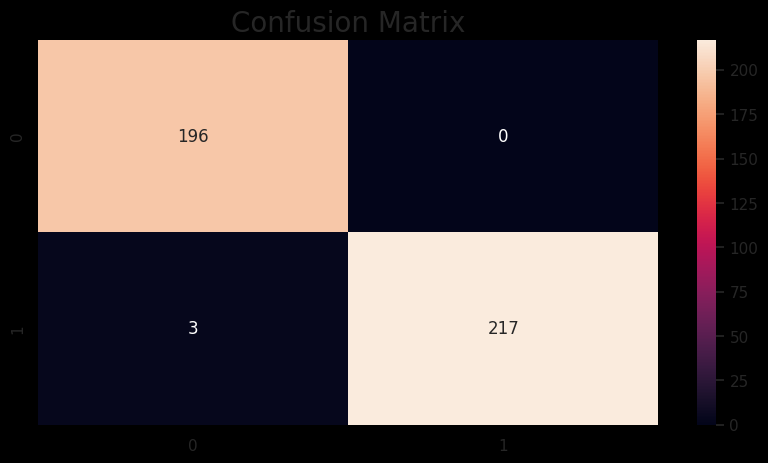

In [94]:
print("Classification Report: \n", classification_report(y_test,y_predictions))
print("-" * 100)
print()
    
acc = accuracy_score(y_test, y_predictions)

print("Accuracy Score: ", acc)
print("-" * 100)
print()

f1 = f1_score(y_test, y_predictions)

print("F1 Score: ", f1)
print("-" * 100)
print()
    
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_predictions), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)
plt.show();

## Observation:

From, the above confusion matrix, it can be seen our model predicted only 3 incorrect values but rest all values were predicted correctly that means that our model performed reasonably well.